In [1]:
# Importing Libraries -------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import os
import re

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # for adjusting the plots

pd.options.mode.chained_assignment = None

In [5]:
# Importing Dataset ---------------------------------------------------------------------------------------------------------

In [6]:
os.getcwd()

'C:\\Users\\Arup\\Documents\\Python_Projects'

In [7]:
df = pd.read_csv(r'C:\Users\Arup\Documents\Python_Projects\Data_movieList.csv')

In [8]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [9]:
len(df) # total rows of data from raw dataset

7668

In [10]:
# Checking Summary, Structure (and Types of Column) of Dataframe ------------------------------------------------------------

In [11]:
# Summary
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [12]:
# Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [13]:
# DataType only
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Change DataType

df['votes'] = df['votes'].values.astype('int64')

In [15]:
# Information on Missing Data --------------------------------------------------------------------------------------------

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [17]:
# Extarct the Year of Movie Release in USA -----------------------------------------------------------------------------------

In [18]:
df['year_released'] = df['released'].str.rsplit(',').str[-1] 

In [19]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980 (United States)


In [20]:
df['year_released_US']=df['year_released'].astype(str).str[1:5] #ignoring the space in front after splitting  from comma

In [21]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,year_released_US
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980 (United States),1980


In [22]:
del df['year_released']

In [23]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released_US
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980


In [24]:
# Evaluating Above Analysis with Refined Movie Dataset from SQL --------------------------------------------------------------

In [25]:
df = pd.read_csv(r'C:\Users\Arup\Documents\Python_Projects\Data_movieList_refined.csv')

In [26]:
len(df) # only 3449 out of 7668 rows left after removing NULLs and the companies producing less than 5 movies

3449

In [27]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
runtime - 0.0%
year - 0.0%
released - 0.0%
month_released - 0.0%
year_released - 0.0%
country_released - 0.0%
budget_million - 0.0%
gross_million - 0.0%
points_million - 0.0%
votes_million - 0.0%
score - 0.0%
writer - 0.0%
director - 0.0%
director_count - 0.0%
director_rank - 0.0%
star - 0.0%
star_count - 0.0%
star_rank - 0.0%
country - 0.0%
country_count - 0.0%
country_rank - 0.0%
company - 0.0%
company_count - 0.0%
company_rank - 0.0%
genre - 0.0%
genre_count - 0.0%
genre_rank - 0.0%
rating - 0.0%
rating_count - 0.0%
rating_rank - 0.0%


In [28]:
df.describe()

,runtime,year,year_released,budget_million,gross_million,points_million,votes_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
count,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.00000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000
mean,108.996231,2001.885764,2001.966657,44.331224,133.367008,0.995015,0.139590,6.378602,5.093360,282.808350,8.031313,205.660481,2534.404465,1.464482,159.71557,14.634677,684.730357,2.993911,1209.688895,1.806321
std,17.947679,10.063876,10.061948,45.505824,213.868510,1.707328,0.208519,0.944848,4.601773,237.438206,7.382424,184.065459,991.253472,1.792118,120.33539,17.220588,363.057508,2.214752,355.621278,0.840641
min,63.000000,1980.000000,1980.000000,0.010000,0.010000,0.001000,0.000000,1.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.00000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,96.000000,1994.000000,1994.000000,15.000000,19.770000,0.151000,0.026000,5.800000,2.000000,72.000000,2.000000,42.000000,2945.000000,1.000000,45.00000,3.000000,239.000000,1.000000,1248.000000,1.000000
50%,106.000000,2003.000000,2003.000000,30.000000,57.620000,0.426000,0.068000,6.400000,4.000000,195.000000,6.000000,128.000000,2945.000000,1.000000,116.00000,8.000000,938.000000,2.000000,1248.000000,2.000000
75%,119.000000,2010.000000,2010.000000,58.000000,157.560000,1.079000,0.165000,7.000000,7.000000,427.000000,12.000000,328.000000,2945.000000,1.000000,298.00000,19.000000,1031.000000,4.000000,1487.000000,2.000000
max,242.000000,2020.000000,2020.000000,356.000000,2847.250000,22.320000,2.400000,9.300000,27.000000,673.000000,30.000000,516.000000,2945.000000,19.000000,330.00000,74.000000,1031.000000,14.000000,1487.000000,7.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3449 non-null   object 
 1   runtime           3449 non-null   int64  
 2   year              3449 non-null   int64  
 3   released          3449 non-null   object 
 4   month_released    3449 non-null   object 
 5   year_released     3449 non-null   int64  
 6   country_released  3449 non-null   object 
 7   budget_million    3449 non-null   float64
 8   gross_million     3449 non-null   float64
 9   points_million    3449 non-null   float64
 10  votes_million     3449 non-null   float64
 11  score             3449 non-null   float64
 12  writer            3449 non-null   object 
 13  director          3449 non-null   object 
 14  director_count    3449 non-null   int64  
 15  director_rank     3449 non-null   int64  
 16  star              3449 non-null   object 


In [30]:
# Examining Outliers of the Refined Dataset ----------------------------------------------------------------------------------

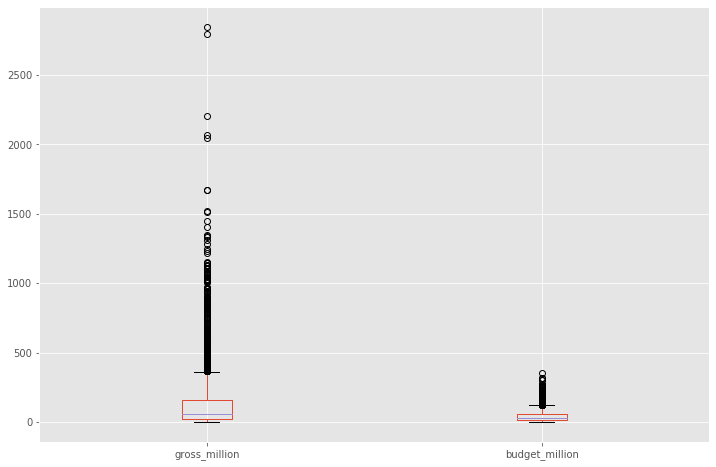

In [31]:
df.boxplot(column=['gross_million','budget_million'])

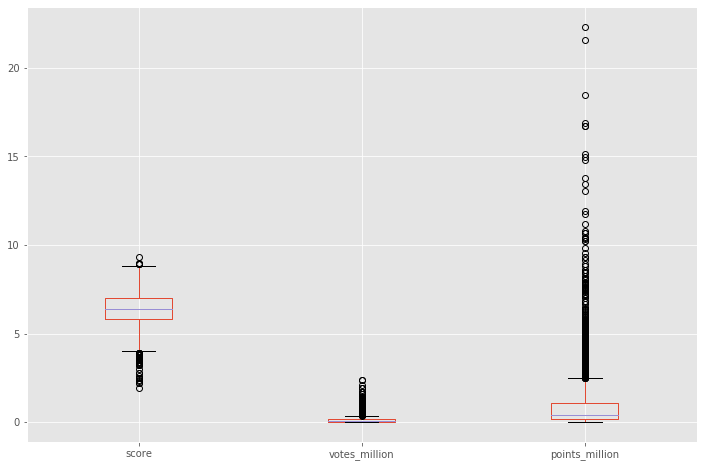

In [32]:
df.boxplot(column=['score', 'votes_million', 'points_million'])

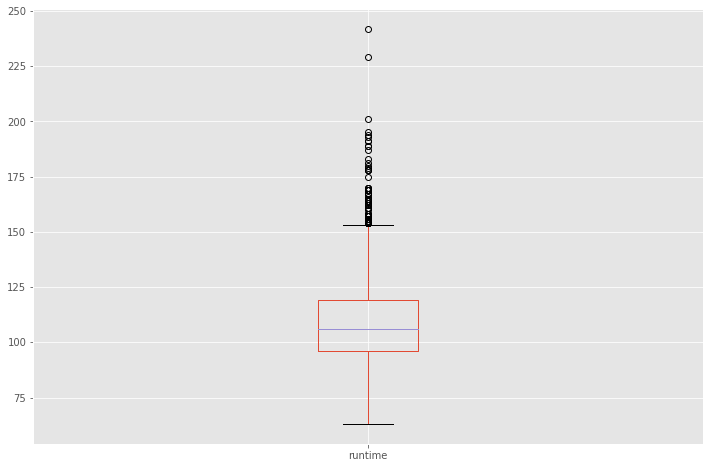

In [33]:
df.boxplot(column=['runtime'])

In [34]:
# Exploring and Dropping Duplicate Rows (if Any) -----------------------------------------------------------------------------

In [35]:
df['name'].drop_duplicates().sort_values(ascending=False)

2001                     Ã†on Flux
2027       xXx: State of the Union
3264    xXx: Return of Xander Cage
1609                           xXx
1299                      eXistenZ
                   ...            
2381                     10,000 BC
115                 10 to Midnight
1264    10 Things I Hate About You
3169           10 Cloverfield Lane
321        *batteries not included
Name: name, Length: 3404, dtype: object

In [36]:
len(df['name'].unique()) # Some Movie names may Repeat

3404

In [37]:
df[df.duplicated(subset=['name'],keep=False)].head(50)

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
5,Friday the 13th,95,1980,"May 9, 1980 (United States)",May,1980,United States,0.55,39.75,0.787,...,1,Paramount Pictures,292,4,Horror,150,8,R,1487,1
16,The Island,109,1980,"June 13, 1980 (United States)",Jun,1980,United States,22.00,15.72,0.021,...,1,Universal Pictures,330,1,Action,1031,1,R,1487,1
27,Halloween II,92,1981,"October 30, 1981 (United States)",Oct,1981,United States,2.50,25.53,0.501,...,1,Dino De Laurentiis Company,18,29,Horror,150,8,R,1487,1
54,The Thing,109,1982,"June 25, 1982 (United States)",Jun,1982,United States,15.00,19.63,3.094,...,1,Universal Pictures,330,1,Horror,150,8,R,1487,1
55,Conan the Barbarian,129,1982,"May 14, 1982 (United States)",May,1982,United States,20.00,68.85,0.973,...,1,Universal Pictures,330,1,Action,1031,1,R,1487,1
60,Poltergeist,114,1982,"June 4, 1982 (United States)",Jun,1982,United States,10.70,77.14,1.080,...,1,Metro-Goldwyn-Mayer (MGM),99,11,Horror,150,8,PG,633,3
131,Ghostbusters,105,1984,"June 8, 1984 (United States)",Jun,1984,United States,30.00,296.19,2.847,...,1,Columbia Pictures,302,2,Action,1031,1,PG,633,3
132,The Karate Kid,126,1984,"June 22, 1984 (United States)",Jun,1984,United States,8.00,91.12,1.497,...,1,Columbia Pictures,302,2,Action,1031,1,PG,633,3
137,A Nightmare on Elm Street,91,1984,"November 16, 1984 (United States)",Nov,1984,United States,1.80,25.51,1.590,...,1,New Line Cinema,155,6,Horror,150,8,R,1487,1
139,Red Dawn,114,1984,"August 10, 1984 (United States)",Aug,1984,United States,17.00,38.38,0.339,...,1,United Artists,30,24,Action,1031,1,PG-13,1248,2


In [38]:
df.loc[df['name'].isin(['Fame','Robocop','Paradise','Rush'])]

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
601,Rush,120,1991,"January 17, 1992 (United States)",Jan,1992,United States,17.0,7.24,0.056,...,1,Metro-Goldwyn-Mayer (MGM),99,11,Action,1031,1,R,1487,1
2521,Fame,107,2009,"September 25, 2009 (United States)",Sep,2009,United States,18.0,77.21,0.082,...,1,Metro-Goldwyn-Mayer (MGM),99,11,Comedy,938,2,PG,633,3
2891,Rush,123,2013,"September 27, 2013 (United States)",Sep,2013,United States,38.0,96.98,3.613,...,2,Exclusive Media Group,7,62,Action,1031,1,R,1487,1


In [39]:
df.drop_duplicates()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980,United States,19.0,47.00,7.787,...,2,Warner Bros.,298,3,Drama,486,3,R,1487,1
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980,United States,4.5,58.85,0.377,...,1,Columbia Pictures,302,2,Adventure,207,5,R,1487,1
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980,United States,18.0,538.38,10.440,...,1,Lucasfilm,10,46,Action,1031,1,PG,633,3
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980,United States,3.5,83.45,1.702,...,1,Paramount Pictures,292,4,Comedy,938,2,PG,633,3
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980,United States,6.0,39.85,0.788,...,1,Orion Pictures,47,18,Comedy,938,2,R,1487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,Tenet,150,2020,"September 3, 2020 (United States)",Sep,2020,United States,205.0,363.66,2.864,...,1,Warner Bros.,298,3,Action,1031,1,PG-13,1248,2
3445,The Invisible Man,124,2020,"February 28, 2020 (United States)",Feb,2020,United States,7.0,143.15,1.321,...,4,Universal Pictures,330,1,Drama,486,3,R,1487,1
3446,Bad Boys for Life,124,2020,"January 17, 2020 (United States)",Jan,2020,United States,90.0,426.51,0.924,...,1,Columbia Pictures,302,2,Action,1031,1,R,1487,1
3447,Sonic the Hedgehog,99,2020,"February 14, 2020 (United States)",Feb,2020,United States,85.0,319.72,0.663,...,1,Paramount Pictures,292,4,Action,1031,1,PG,633,3


In [40]:
len(df) # No Duplicates, So All rows are unique, but Movie Names / Company may repeat 

3449

In [41]:
companyList = df['company'].unique()
companyList

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm',
       'Paramount Pictures', 'Orion Pictures', 'Universal Pictures',
       'United Artists', 'Lorimar Film Entertainment',
       'Twentieth Century', 'PolyGram Filmed Entertainment',
       'Jack Rollins & Charles H. Joffe Productions', 'Walt Disney',
       'Golden Harvest Company', 'Eon Productions',
       'Dino De Laurentiis Company', 'Metro-Goldwyn-Mayer (MGM)',
       'Brooksfilms', 'The Ladd Company',
       'Incorporated Television Company (ITC)',
       'Goldcrest Films International', 'Golan-Globus Productions',
       'Atlantic Entertainment Group', 'Amblin Entertainment',
       'Cannon Films', 'De Laurentiis Entertainment Group (DEG)',
       'New Line Cinema', 'Constantin Film', 'Touchstone Pictures',
       'TriStar Pictures', 'New World Pictures', 'The Cannon Group',
       'Hemdale', 'Fox Pictures', '40 Acres & A Mule Filmworks',
       'Carolco Pictures', 'Morgan Creek Entertainment',
       'Imagine Entertain

In [42]:
df['company'].str.match('Warner')

0        True
1       False
2       False
3       False
4       False
        ...  
3444     True
3445    False
3446    False
3447    False
3448    False
Name: company, Length: 3449, dtype: bool

In [43]:
df[df['company'].str.startswith('W')]

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980,United States,19.0,47.00,7.787,...,2,Warner Bros.,298,3,Drama,486,3,R,1487,1
14,Private Benjamin,109,1980,"October 10, 1980 (United States)",Oct,1980,United States,10.0,69.85,0.149,...,1,Warner Bros.,298,3,Comedy,938,2,R,1487,1
20,Bronco Billy,116,1980,"June 11, 1980 (United States)",Jun,1980,United States,6.5,24.27,0.067,...,1,Warner Bros.,298,3,Action,1031,1,PG,633,3
21,The Last Flight of Noah's Ark,97,1980,"June 25, 1980 (United States)",Jun,1980,United States,6.0,11.00,0.008,...,1,Walt Disney,129,7,Adventure,207,5,G,70,4
28,The Fox and the Hound,83,1981,"July 10, 1981 (United States)",Jul,1981,United States,12.0,63.46,0.635,...,1,Walt Disney,129,7,Animation,186,6,G,70,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,PokÃ©mon Detective Pikachu,104,2019,"May 10, 2019 (United States)",May,2019,United States,150.0,433.92,0.964,...,1,Warner Bros.,298,3,Action,1031,1,PG,633,3
3416,Maleficent: Mistress of Evil,119,2019,"October 18, 2019 (United States)",Oct,2019,United States,185.0,491.73,0.601,...,1,Walt Disney,129,7,Adventure,207,5,PG,633,3
3423,The Lego Movie 2: The Second Part,107,2019,"February 8, 2019 (United States)",Feb,2019,United States,99.0,192.31,0.383,...,16,Warner Bros.,298,3,Animation,186,6,PG,633,3
3425,Dumbo,112,2019,"March 29, 2019 (United States)",Mar,2019,United States,170.0,353.28,0.435,...,1,Walt Disney,129,7,Adventure,207,5,PG,633,3


In [44]:
len(companyList)

86

In [45]:
len(df.loc[df['company'].isin(['Walt Disney'])])

129

In [46]:
# Calculation with Column if NA exists ---------------------------------------------------------------------------------------

In [47]:
df1=df # Copying Active Dataset

In [48]:
df1['company'] = df1['company'].fillna('')

In [49]:
df1[df1['company'].str.startswith('Walt')].head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
21,The Last Flight of Noah's Ark,97,1980,"June 25, 1980 (United States)",Jun,1980,United States,6.0,11.00,0.008,...,1,Walt Disney,129,7,Adventure,207,5,G,70,4
28,The Fox and the Hound,83,1981,"July 10, 1981 (United States)",Jul,1981,United States,12.0,63.46,0.635,...,1,Walt Disney,129,7,Animation,186,6,G,70,4
65,Tron,96,1982,"July 9, 1982 (United States)",Jul,1982,United States,17.0,33.00,0.782,...,1,Walt Disney,129,7,Action,1031,1,PG,633,3
90,Night Crossing,107,1982,"February 5, 1982 (United States)",Feb,1982,United States,10.0,8.00,0.008,...,2,Walt Disney,129,7,Drama,486,3,PG,633,3
113,Something Wicked This Way Comes,95,1983,"April 29, 1983 (United States)",Apr,1983,United States,19.0,8.40,0.058,...,1,Walt Disney,129,7,Fantasy,27,9,PG,633,3


In [50]:
# Order the Data to Explore --------------------------------------------------------------------------------------------------

In [51]:
df.sort_values(by=['gross_million'], inplace=False, ascending=False)

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
2424,Avatar,162,2009,"December 18, 2009 (United States)",Dec,2009,United States,237.0,2847.25,8.580,...,1,Twentieth Century,216,5,Action,1031,1,PG-13,1248,2
3372,Avengers: Endgame,181,2019,"April 26, 2019 (United States)",Apr,2019,United States,356.0,2797.50,7.585,...,1,Marvel Studios,12,39,Action,1031,1,PG-13,1248,2
1070,Titanic,194,1997,"December 19, 1997 (United States)",Dec,1997,United States,200.0,2201.65,8.580,...,1,Twentieth Century,216,5,Drama,486,3,PG-13,1248,2
3062,Star Wars: Episode VII - The Force Awakens,138,2015,"December 18, 2015 (United States)",Dec,2015,United States,245.0,2069.52,6.833,...,1,Lucasfilm,10,46,Action,1031,1,PG-13,1248,2
3298,Avengers: Infinity War,149,2018,"April 27, 2018 (United States)",Apr,2018,United States,321.0,2048.36,7.535,...,1,Marvel Studios,12,39,Action,1031,1,PG-13,1248,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Fandango,91,1985,"January 25, 1985 (United States)",Jan,1985,United States,7.0,0.09,0.050,...,1,Warner Bros.,298,3,Comedy,938,2,PG,633,3
874,My Summer Story,85,1994,"September 23, 1994 (United States)",Sep,1994,United States,15.0,0.07,0.008,...,1,Metro-Goldwyn-Mayer (MGM),99,11,Comedy,938,2,PG,633,3
1457,Committed,98,2000,"April 18, 2000 (Canada)",Apr,2000,Canada,3.0,0.04,0.019,...,1,Miramax,66,14,Comedy,938,2,R,1487,1
1274,The Boondock Saints,108,1999,"January 21, 2000 (Canada)",Jan,2000,Canada,6.0,0.03,1.794,...,1,Franchise Pictures,10,46,Action,1031,1,R,1487,1


In [52]:
# Scatterplot and Regplot ----------------------------------------------------------------------------------------------------

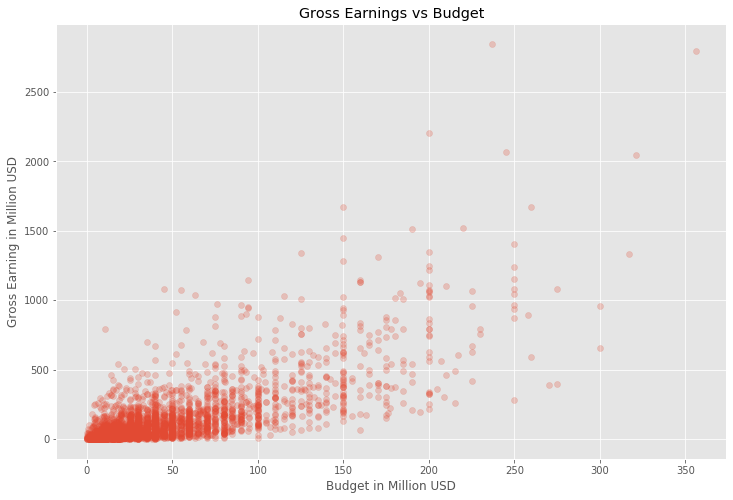

In [53]:
# Gross vs Budget Relation (Scatterplot)

plt.scatter(x=df['budget_million'], y=df['gross_million'],alpha=0.25)

plt.title ('Gross Earnings vs Budget')
plt.xlabel('Budget in Million USD')
plt.ylabel('Gross Earning in Million USD')

plt.show()

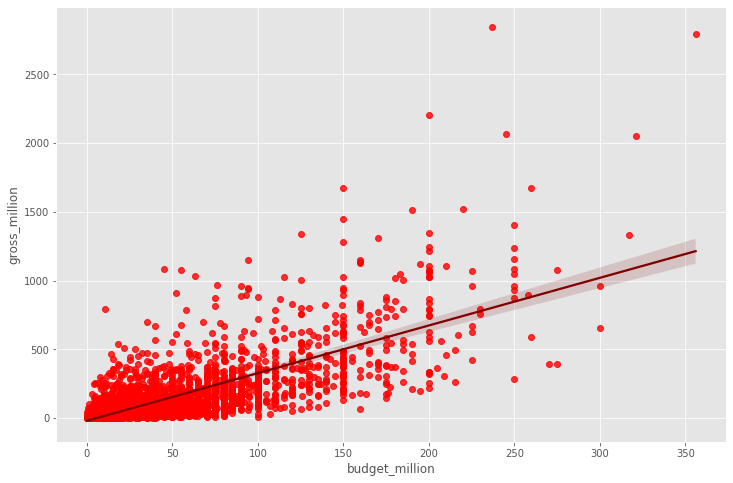

In [54]:
# Gross vs Budget Relation (Similar Graph with Seaborn's Regplot)

sns.regplot(x='budget_million', y='gross_million', data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'maroon'})

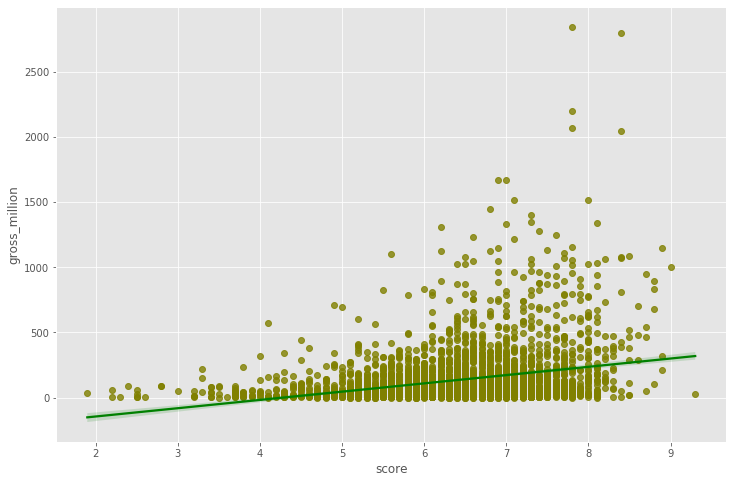

In [55]:
# Gross vs Score Relation with Regplot

sns.regplot(x="score", y="gross_million", data=df, scatter_kws = {'color':'olive'}, line_kws = {'color':'green'})

In [56]:
# Swarmplot and Stripplot ----------------------------------------------------------------------------------------------------

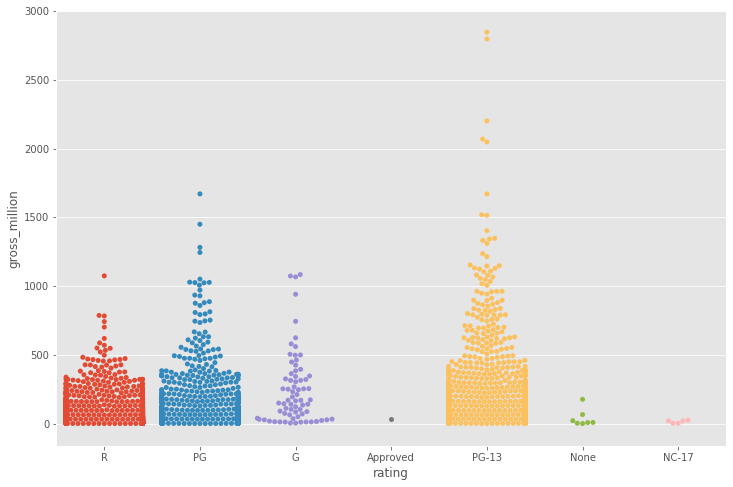

In [57]:
# Swarmplot for Gross vs Rating
sns.swarmplot(x='rating', y='gross_million', data=df)

In [58]:
# Stripplot for Gross vs Rating
# sns.stripplot(x='rating', y='gross_million', data=df)

In [59]:
# Finding Correlations --------------------------------------------------------------------------------------------------------

In [60]:
df.corr() #default method ='pearson'       

,runtime,year,year_released,budget_million,gross_million,points_million,votes_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.084140,0.085674,0.348668,0.322428,0.401703,0.404953,0.450459,0.291621,-0.287420,0.233493,-0.249390,-0.064886,0.053759,0.087775,-0.038283,-0.006565,-0.078085,0.211167,-0.176147
year,0.084140,1.000000,0.999535,0.385928,0.305123,0.174358,0.211882,0.029438,-0.097363,0.078506,0.008261,-0.023645,-0.066548,0.043804,-0.012852,-0.067715,-0.013854,0.026474,0.058316,-0.004707
year_released,0.085674,0.999535,1.000000,0.382010,0.302323,0.173783,0.210990,0.033573,-0.097407,0.079170,0.007050,-0.022830,-0.070719,0.047067,-0.016778,-0.063059,-0.016549,0.028232,0.060599,-0.007416
budget_million,0.348668,0.385928,0.382010,1.000000,0.737670,0.387478,0.436180,0.124820,0.179981,-0.225481,0.245543,-0.237516,0.024307,-0.020234,0.203141,-0.193592,0.099442,-0.116281,-0.162597,0.212640
gross_million,0.322428,0.305123,0.302323,0.737670,1.000000,0.577987,0.618967,0.280903,0.145977,-0.180294,0.160722,-0.163962,0.024788,-0.019395,0.131008,-0.132767,0.035403,-0.037252,-0.147502,0.183994
points_million,0.401703,0.174358,0.173783,0.387478,0.577987,1.000000,0.994225,0.543024,0.192555,-0.207125,0.191074,-0.189622,-0.006796,0.001185,0.083926,-0.080823,0.000194,-0.025468,0.036032,-0.018597
votes_million,0.404953,0.211882,0.210990,0.436180,0.618967,0.994225,1.000000,0.531244,0.201020,-0.221734,0.205799,-0.204756,-0.000831,-0.004533,0.099592,-0.095601,0.018462,-0.039590,0.038602,-0.015493
score,0.450459,0.029438,0.033573,0.124820,0.280903,0.543024,0.531244,1.000000,0.229825,-0.240361,0.158786,-0.179711,-0.064521,0.042148,0.012088,0.003428,-0.147327,0.077260,0.068195,-0.087997
director_count,0.291621,-0.097363,-0.097407,0.179981,0.145977,0.192555,0.201020,0.229825,1.000000,-0.749754,0.241658,-0.222353,0.072920,-0.035398,0.130589,-0.090915,0.023157,-0.043653,0.027923,-0.016391
director_rank,-0.287420,0.078506,0.079170,-0.225481,-0.180294,-0.207125,-0.221734,-0.240361,-0.749754,1.000000,-0.268692,0.280471,-0.065108,0.044250,-0.150374,0.106350,-0.052826,0.083639,-0.033158,0.022446


In [61]:
df.corr(method ='kendall')

,runtime,year,year_released,budget_million,gross_million,points_million,votes_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.064061,0.065034,0.225006,0.182014,0.245210,0.226924,0.312598,0.217892,-0.217892,0.186880,-0.186880,-0.045658,0.045658,0.054164,-0.054164,0.067473,-0.067473,0.132518,-0.132518
year,0.064061,1.000000,0.995431,0.283026,0.285456,0.284448,0.299076,0.026077,-0.070811,0.070811,0.001798,-0.001798,-0.054244,0.054244,0.010024,-0.010024,0.007148,-0.007148,-0.025607,0.025607
year_released,0.065034,0.995431,1.000000,0.279250,0.282175,0.283939,0.298165,0.029158,-0.071469,0.071469,0.000905,-0.000905,-0.057629,0.057629,0.007275,-0.007275,0.005232,-0.005232,-0.023023,0.023023
budget_million,0.225006,0.283026,0.279250,1.000000,0.503701,0.352480,0.371748,0.043088,0.198642,-0.198642,0.272234,-0.272234,0.014702,-0.014702,0.196646,-0.196646,0.149931,-0.149931,-0.189214,0.189214
gross_million,0.182014,0.285456,0.282175,0.503701,1.000000,0.565611,0.585700,0.177940,0.197629,-0.197629,0.202022,-0.202022,0.046527,-0.046527,0.189855,-0.189855,0.080004,-0.080004,-0.177107,0.177107
points_million,0.245210,0.284448,0.283939,0.352480,0.565611,1.000000,0.947184,0.439579,0.212526,-0.212526,0.212497,-0.212497,-0.007221,0.007221,0.112679,-0.112679,0.066273,-0.066273,0.004848,-0.004848
votes_million,0.226924,0.299076,0.298165,0.371748,0.585700,0.947184,1.000000,0.384386,0.207398,-0.207398,0.210930,-0.210930,-0.000308,0.000308,0.119373,-0.119373,0.079174,-0.079174,-0.002793,0.002793
score,0.312598,0.026077,0.029158,0.043088,0.177940,0.439579,0.384386,1.000000,0.172330,-0.172330,0.112491,-0.112491,-0.054384,0.054384,0.003393,-0.003393,-0.094057,0.094057,0.065997,-0.065997
director_count,0.217892,-0.070811,-0.071469,0.198642,0.197629,0.212526,0.207398,0.172330,1.000000,-1.000000,0.215752,-0.215752,0.058907,-0.058907,0.106847,-0.106847,0.058325,-0.058325,0.011860,-0.011860
director_rank,-0.217892,0.070811,0.071469,-0.198642,-0.197629,-0.212526,-0.207398,-0.172330,-1.000000,1.000000,-0.215752,0.215752,-0.058907,0.058907,-0.106847,0.106847,-0.058325,0.058325,-0.011860,0.011860


In [62]:
df.corr(method ='spearman')

,runtime,year,year_released,budget_million,gross_million,points_million,votes_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.093888,0.095356,0.323582,0.265091,0.357043,0.331301,0.437780,0.304699,-0.304699,0.264345,-0.264345,-0.056822,0.056822,0.079873,-0.079873,0.092107,-0.092107,0.171025,-0.171025
year,0.093888,1.000000,0.999550,0.397054,0.414857,0.410891,0.430455,0.038194,-0.097268,0.097268,0.004354,-0.004354,-0.067523,0.067523,0.014170,-0.014170,0.009824,-0.009824,-0.030469,0.030469
year_released,0.095356,0.999550,1.000000,0.391860,0.410375,0.410250,0.429273,0.042764,-0.098164,0.098164,0.003171,-0.003171,-0.071764,0.071764,0.010286,-0.010286,0.007215,-0.007215,-0.027223,0.027223
budget_million,0.323582,0.397054,0.391860,1.000000,0.683644,0.500773,0.524951,0.063032,0.277981,-0.277981,0.379636,-0.379636,0.018382,-0.018382,0.283284,-0.283284,0.202243,-0.202243,-0.242887,0.242887
gross_million,0.265091,0.414857,0.410375,0.683644,1.000000,0.757743,0.777235,0.260424,0.278760,-0.278760,0.289515,-0.289515,0.058565,-0.058565,0.275528,-0.275528,0.107801,-0.107801,-0.228453,0.228453
points_million,0.357043,0.410891,0.410250,0.500773,0.757743,1.000000,0.994838,0.608253,0.301341,-0.301341,0.306232,-0.306232,-0.009153,0.009153,0.163817,-0.163817,0.089915,-0.089915,0.005908,-0.005908
votes_million,0.331301,0.430455,0.429273,0.524951,0.777235,0.994838,1.000000,0.539223,0.293578,-0.293578,0.303783,-0.303783,-0.000521,0.000521,0.172941,-0.172941,0.107704,-0.107704,-0.004144,0.004144
score,0.437780,0.038194,0.042764,0.063032,0.260424,0.608253,0.539223,1.000000,0.240181,-0.240181,0.158592,-0.158592,-0.067414,0.067414,0.004394,-0.004394,-0.125251,0.125251,0.083414,-0.083414
director_count,0.304699,-0.097268,-0.098164,0.277981,0.278760,0.301341,0.293578,0.240181,1.000000,-1.000000,0.293201,-0.293201,0.070366,-0.070366,0.149408,-0.149408,0.076105,-0.076105,0.014453,-0.014453
director_rank,-0.304699,0.097268,0.098164,-0.277981,-0.278760,-0.301341,-0.293578,-0.240181,-1.000000,1.000000,-0.293201,0.293201,-0.070366,0.070366,-0.149408,0.149408,-0.076105,0.076105,-0.014453,0.014453


In [63]:
# Correlations for Two or More selected Variables ---------------------------------------------------------------------------

In [64]:
# Numerizing Month for Selection

month_condition = [
                    (df['month_released'] == 'Jan'), (df['month_released'] == 'Feb'), (df['month_released'] == 'Mar'),
                    (df['month_released'] == 'Apr'), (df['month_released'] == 'May'), (df['month_released'] == 'Jun'),
                    (df['month_released'] == 'Jul'), (df['month_released'] == 'Aug'), (df['month_released'] == 'Sep'),
                    (df['month_released'] == 'Oct'), (df['month_released'] == 'Nov'), (df['month_released'] == 'Dec')]

month_value = [1,2,3,4,5,6,7,8,9,10,11,12]

df['month_number'] = np.select(month_condition,month_value)

In [65]:
df.head(10) # Dataframe updated with new column

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980,United States,19.00,47.00,7.787,...,Warner Bros.,298,3,Drama,486,3,R,1487,1,6
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980,United States,4.50,58.85,0.377,...,Columbia Pictures,302,2,Adventure,207,5,R,1487,1,7
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980,United States,18.00,538.38,10.440,...,Lucasfilm,10,46,Action,1031,1,PG,633,3,6
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980,United States,3.50,83.45,1.702,...,Paramount Pictures,292,4,Comedy,938,2,PG,633,3,7
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980,United States,6.00,39.85,0.788,...,Orion Pictures,47,18,Comedy,938,2,R,1487,1,7
5,Friday the 13th,95,1980,"May 9, 1980 (United States)",May,1980,United States,0.55,39.75,0.787,...,Paramount Pictures,292,4,Horror,150,8,R,1487,1,5
6,The Blues Brothers,133,1980,"June 20, 1980 (United States)",Jun,1980,United States,27.00,115.23,1.485,...,Universal Pictures,330,1,Action,1031,1,R,1487,1,6
7,The Long Riders,100,1980,"May 16, 1980 (United States)",May,1980,United States,10.00,15.80,0.070,...,United Artists,30,24,Biography,160,7,R,1487,1,5
8,Popeye,114,1980,"December 12, 1980 (United States)",Dec,1980,United States,20.00,49.82,0.159,...,Paramount Pictures,292,4,Adventure,207,5,PG,633,3,12
9,Ordinary People,124,1980,"September 19, 1980 (United States)",Sep,1980,United States,6.00,54.77,0.377,...,Paramount Pictures,292,4,Drama,486,3,R,1487,1,9


In [66]:
selected_column = ['month_number',
                   'year',
                   'country_rank',
                   'company_rank',
                   'rating_rank',
                   'genre_rank',
                   'star_rank',
                   'director_rank',
                   'budget_million',
                   'gross_million',
                   'points_million',
                   'votes_million',
                   'score']

In [67]:
df[selected_column].corr()

,month_number,year,country_rank,company_rank,rating_rank,genre_rank,star_rank,director_rank,budget_million,gross_million,points_million,votes_million,score
month_number,1.000000,-0.016111,0.005790,-0.031672,0.052767,0.048544,-0.038528,-0.059958,0.072893,0.065039,0.065408,0.064216,0.058577
year,-0.016111,1.000000,0.043804,-0.067715,-0.004707,0.026474,-0.023645,0.078506,0.385928,0.305123,0.174358,0.211882,0.029438
country_rank,0.005790,0.043804,1.000000,0.133167,0.036245,0.058073,0.047099,0.044250,-0.020234,-0.019395,0.001185,-0.004533,0.042148
company_rank,-0.031672,-0.067715,0.133167,1.000000,-0.095184,0.013835,0.106921,0.106350,-0.193592,-0.132767,-0.080823,-0.095601,0.003428
rating_rank,0.052767,-0.004707,0.036245,-0.095184,1.000000,0.074138,0.086149,0.022446,0.212640,0.183994,-0.018597,-0.015493,-0.087997
genre_rank,0.048544,0.026474,0.058073,0.013835,0.074138,1.000000,0.179404,0.083639,-0.116281,-0.037252,-0.025468,-0.039590,0.077260
star_rank,-0.038528,-0.023645,0.047099,0.106921,0.086149,0.179404,1.000000,0.280471,-0.237516,-0.163962,-0.189622,-0.204756,-0.179711
director_rank,-0.059958,0.078506,0.044250,0.106350,0.022446,0.083639,0.280471,1.000000,-0.225481,-0.180294,-0.207125,-0.221734,-0.240361
budget_million,0.072893,0.385928,-0.020234,-0.193592,0.212640,-0.116281,-0.237516,-0.225481,1.000000,0.737670,0.387478,0.436180,0.124820
gross_million,0.065039,0.305123,-0.019395,-0.132767,0.183994,-0.037252,-0.163962,-0.180294,0.737670,1.000000,0.577987,0.618967,0.280903


In [68]:
# Only a Pair Correlation

df[['runtime','score']].corr()

,runtime,score
runtime,1.000000,0.450459
score,0.450459,1.000000


In [69]:
# Visualize Correlation with HeatMap -----------------------------------------------------------------------------------------

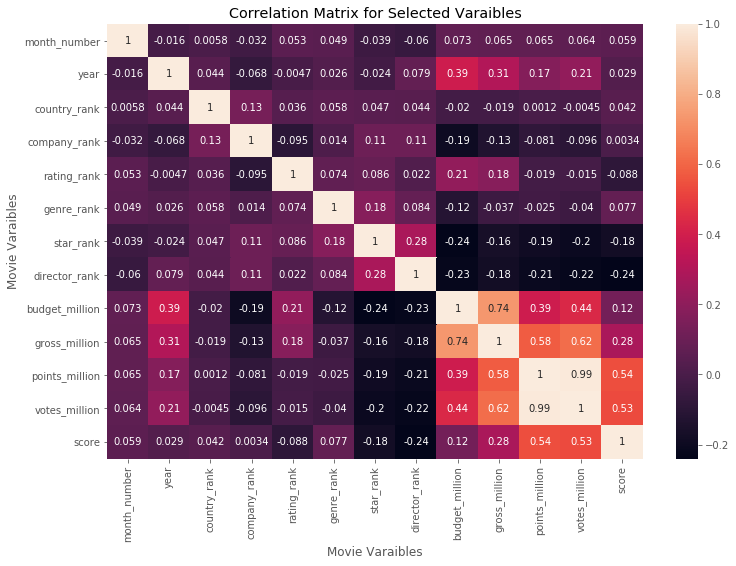

In [70]:
correlation_matrix = df[selected_column].corr()
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Selected Varaibles")
plt.xlabel("Movie Varaibles")
plt.ylabel("Movie Varaibles")

plt.show()

In [71]:
# Factorize or Numerize all catergorical values in order to be included for heatmap -----------------------------------------

In [72]:
# Method_1

df_numerized = df

# for col_name in df_numerized.columns:
#     if(df_numerized[col_name].dtype == 'object'):
#         df_numerized[col_name]= df_numerized[col_name].astype('category')
#         df_numerized[col_name] = df_numerized[col_name].cat.codes
        
# df_numerized.corr()

In [73]:
# Method_2

df_factorized = df
df_factorized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
name,1.000000,0.060465,0.962974,0.966551,0.058688,0.959351,0.080096,0.343761,0.900555,0.622206,...,0.298249,0.187498,0.187498,0.056577,0.057876,0.057876,0.184063,0.184063,0.184063,0.058688
runtime,0.060465,1.000000,0.076960,0.067172,-0.014087,0.079147,-0.019825,0.160255,0.069415,0.132732,...,-0.036975,-0.023129,-0.023129,-0.027867,-0.028928,-0.028928,0.048860,0.048860,0.048860,-0.014087
year,0.962974,0.076960,1.000000,0.997021,0.057152,0.995574,0.078534,0.372310,0.926552,0.645390,...,0.304357,0.192253,0.192253,0.053562,0.054947,0.054947,0.194714,0.194714,0.194714,0.057152
released,0.966551,0.067172,0.997021,1.000000,0.052363,0.993244,0.085084,0.364443,0.929776,0.642506,...,0.304460,0.189555,0.189555,0.054660,0.056041,0.056041,0.188868,0.188868,0.188868,0.052363
month_released,0.058688,-0.014087,0.057152,0.052363,1.000000,0.061298,0.017985,-0.108448,0.030447,0.000668,...,0.142836,0.113989,0.113989,0.029708,0.030411,0.030411,-0.049537,-0.049537,-0.049537,1.000000
year_released,0.959351,0.079147,0.995574,0.993244,0.061298,1.000000,0.078510,0.365718,0.921889,0.642097,...,0.306322,0.195225,0.195225,0.054043,0.055374,0.055374,0.189428,0.189428,0.189428,0.061298
country_released,0.080096,-0.019825,0.078534,0.085084,0.017985,0.078510,1.000000,-0.047072,0.028580,-0.017098,...,0.126018,0.071936,0.071936,0.028590,0.026906,0.026906,-0.040692,-0.040692,-0.040692,0.017985
budget_million,0.343761,0.160255,0.372310,0.364443,-0.108448,0.365718,-0.047072,1.000000,0.375526,0.412889,...,-0.100320,-0.088177,-0.088177,0.017470,0.019658,0.019658,0.224426,0.224426,0.224426,-0.108448
gross_million,0.900555,0.069415,0.926552,0.929776,0.030447,0.921889,0.028580,0.375526,1.000000,0.626866,...,0.254117,0.154599,0.154599,0.057937,0.059280,0.059280,0.194056,0.194056,0.194056,0.030447
points_million,0.622206,0.132732,0.645390,0.642506,0.000668,0.642097,-0.017098,0.412889,0.626866,1.000000,...,0.109375,0.067662,0.067662,0.027597,0.027587,0.027587,0.140219,0.140219,0.140219,0.000668


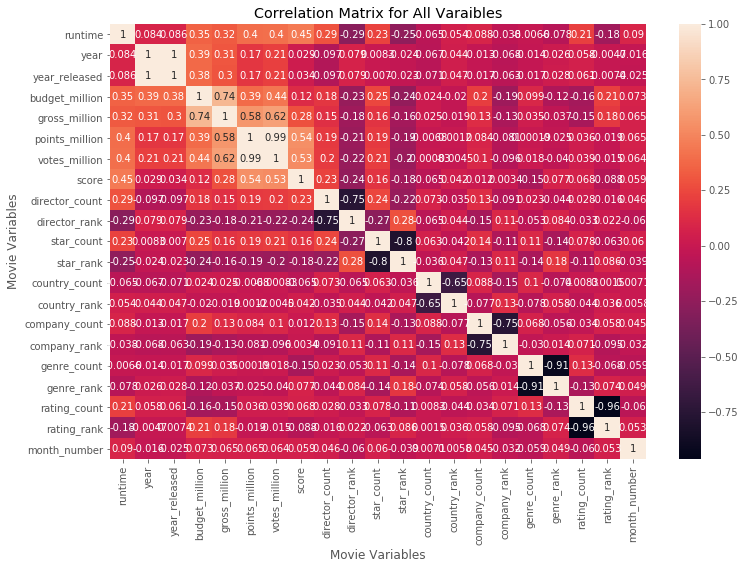

In [74]:
# Now Plotting HeatMap for 2nd Method

correlation_matrix_all = df_factorized.corr(method='pearson')
sns.heatmap(correlation_matrix_all, annot = True)

plt.title("Correlation Matrix for All Varaibles")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")

plt.show()

In [75]:
# Finding Correlation Pairs with only the Selected Numeric Variables ----------------------------------------------------------

In [76]:
correlation_pair = correlation_matrix.unstack()
print(correlation_pair)

month_number  month_number      1.000000
              year             -0.016111
              country_rank      0.005790
              company_rank     -0.031672
              rating_rank       0.052767
                                  ...   
score         budget_million    0.124820
              gross_million     0.280903
              points_million    0.543024
              votes_million     0.531244
              score             1.000000
Length: 169, dtype: float64


In [77]:
sorted_pair = correlation_pair.sort_values(kind="quicksort")
print(sorted_pair)

director_rank   score            -0.240361
score           director_rank    -0.240361
budget_million  star_rank        -0.237516
star_rank       budget_million   -0.237516
budget_million  director_rank    -0.225481
                                    ...   
company_rank    company_rank      1.000000
country_rank    country_rank      1.000000
year            year              1.000000
votes_million   votes_million     1.000000
score           score             1.000000
Length: 169, dtype: float64


In [78]:
strong_pair = sorted_pair[abs(sorted_pair) > 0.5]
print(strong_pair)

votes_million   score             0.531244
score           votes_million     0.531244
points_million  score             0.543024
score           points_million    0.543024
points_million  gross_million     0.577987
gross_million   points_million    0.577987
                votes_million     0.618967
votes_million   gross_million     0.618967
gross_million   budget_million    0.737670
budget_million  gross_million     0.737670
votes_million   points_million    0.994225
points_million  votes_million     0.994225
month_number    month_number      1.000000
star_rank       star_rank         1.000000
points_million  points_million    1.000000
gross_million   gross_million     1.000000
budget_million  budget_million    1.000000
director_rank   director_rank     1.000000
genre_rank      genre_rank        1.000000
rating_rank     rating_rank       1.000000
company_rank    company_rank      1.000000
country_rank    country_rank      1.000000
year            year              1.000000
votes_milli

In [79]:
true_strong_pair = strong_pair[abs(strong_pair) < .99]
print(true_strong_pair)

votes_million   score             0.531244
score           votes_million     0.531244
points_million  score             0.543024
score           points_million    0.543024
points_million  gross_million     0.577987
gross_million   points_million    0.577987
                votes_million     0.618967
votes_million   gross_million     0.618967
gross_million   budget_million    0.737670
budget_million  gross_million     0.737670
dtype: float64


In [80]:
# Exploring Top 20 compaies by Gross Earnings --------------------------------------------------------------------------------

In [81]:
# Overall Earnings

company_gross_sum = df.groupby('company')[['gross_million']].sum()

company_gross_sum_sort = company_gross_sum.sort_values('gross_million', ascending = False)[:20]
company_gross_sum_sort = company_gross_sum_sort['gross_million'].astype('int64') 

company_gross_sum_sort

company
Warner Bros.                 54610
Universal Pictures           51241
Twentieth Century            42856
Walt Disney                  42649
Columbia Pictures            42356
Paramount Pictures           41033
Dreamworks                   24927
New Line Cinema              19612
Marvel Studios               15065
Touchstone Pictures          10664
Fox Pictures                  9746
Metro-Goldwyn-Mayer (MGM)     8936
Summit Entertainment          8318
Pixar Animation Studios       7886
Lucasfilm                     7185
Lions Gate                    6474
TriStar Pictures              5405
Screen Gems                   4113
Miramax                       3703
Dimension Films               3611
Name: gross_million, dtype: int64

In [82]:
# Annual Earnings by Grouping 

df.groupby(['company', 'year'])[['gross_million']].sum()

gross_million
company                 year               
3 Arts Entertainment    1996          60.21
                        1997          75.81
                        2001          71.19
                        2010           0.65
                        2013           3.91
...                                     ...
Warner Bros.            2020         363.66
Worldview Entertainment 2013          21.05
                        2014           5.67
                        2016          23.18
                        2017           9.20

[1032 rows x 1 columns]

In [83]:
company_gross_sum_annual = df.groupby(['company','year'])[['gross_million']].sum()

company_gross_sum_sort_annual = company_gross_sum_annual.sort_values(['gross_million', 'company','year'],ascending = False)[:20]
company_gross_sum_sort_annual = company_gross_sum_sort_annual['gross_million'].astype('int64') 

company_gross_sum_sort_annual

company             year
Walt Disney         2019    7223
Twentieth Century   2009    4680
Marvel Studios      2018    4018
Walt Disney         2017    3986
Universal Pictures  2015    3834
Walt Disney         2010    3696
Paramount Pictures  2011    3569
Warner Bros.        2011    3223
Paramount Pictures  2014    3071
Twentieth Century   2014    2936
Columbia Pictures   2006    2934
                    2019    2932
Walt Disney         2013    2896
Marvel Studios      2019    2797
Warner Bros.        2018    2774
Columbia Pictures   2011    2738
Dreamworks          2007    2722
Walt Disney         2007    2701
Warner Bros.        2005    2688
                    2004    2662
Name: gross_million, dtype: int64

In [84]:
# Catplot (/Factorplot) -----------------------------------------------------------------------------------------------------

In [85]:
df_monthsort=df.sort_values('month_number')
df_monthsort

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
3448,Dolittle,101,2020,"January 17, 2020 (United States)",Jan,2020,United States,175.0,245.49,0.297,...,Universal Pictures,330,1,Adventure,207,5,PG,633,3,1
2187,There Will Be Blood,158,2007,"January 25, 2008 (United States)",Jan,2008,United States,25.0,76.18,4.387,...,Paramount Pictures,292,4,Drama,486,3,R,1487,1,1
2198,Atonement,123,2007,"January 11, 2008 (United States)",Jan,2008,United States,30.0,131.02,2.020,...,Universal Pictures,330,1,Drama,486,3,R,1487,1,1
494,Physical Evidence,99,1989,"January 27, 1989 (United States)",Jan,1989,United States,17.0,3.56,0.008,...,Columbia Pictures,302,2,Crime,239,4,R,1487,1,1
2243,Epic Movie,86,2007,"January 26, 2007 (United States)",Jan,2007,United States,20.0,87.24,0.247,...,New Regency Productions,38,21,Adventure,207,5,PG-13,1248,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Darkest Hour,125,2017,"December 22, 2017 (United States)",Dec,2017,United States,30.0,150.85,1.325,...,Focus Features,41,20,Biography,160,7,PG-13,1248,2,12
1730,Cold Mountain,154,2003,"December 25, 2003 (United States)",Dec,2003,United States,79.0,173.01,1.022,...,Miramax,66,14,Adventure,207,5,R,1487,1,12
75,The Toy,102,1982,"December 10, 1982 (United States)",Dec,1982,United States,17.0,47.12,0.064,...,Columbia Pictures,302,2,Comedy,938,2,PG,633,3,12
571,JFK,189,1991,"December 20, 1991 (United States)",Dec,1991,United States,40.0,205.41,1.168,...,Warner Bros.,298,3,Drama,486,3,R,1487,1,12


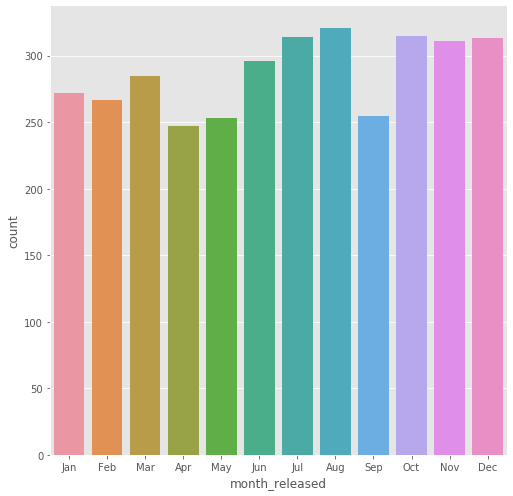

In [86]:
# sns.factorplot(data = df, x = 'month_number', kind = 'count' , size = 10)
sns.catplot(data = df_monthsort, x = 'month_released', kind = 'count' , height = 7)

In [87]:
# Multiple plots on the same Grid -------------------------------------------------------------------------------------------

In [88]:
df_genresort=df.sort_values('genre_rank')
df_genresort.genre.unique()

array(['Action', 'Comedy', 'Drama', 'Crime', 'Adventure', 'Animation',
       'Biography', 'Horror', 'Fantasy', 'Mystery', 'Thriller', 'Sci-Fi',
       'Romance', 'Family', 'Western'], dtype=object)

In [89]:
# Filter the dataframe by genre (slow approach)

df2 = df[(df.genre == 'Action') | (df.genre == 'Comedy') | (df.genre == 'Drama') | (df.genre == 'Crime') | (df.genre == 'Adventure')]
df2.head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980,United States,19.0,47.00,7.787,...,Warner Bros.,298,3,Drama,486,3,R,1487,1,6
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980,United States,4.5,58.85,0.377,...,Columbia Pictures,302,2,Adventure,207,5,R,1487,1,7
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980,United States,18.0,538.38,10.440,...,Lucasfilm,10,46,Action,1031,1,PG,633,3,6
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980,United States,3.5,83.45,1.702,...,Paramount Pictures,292,4,Comedy,938,2,PG,633,3,7
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980,United States,6.0,39.85,0.788,...,Orion Pictures,47,18,Comedy,938,2,R,1487,1,7


In [90]:
df_companysort=df.sort_values('company_rank')
df_companysort.company.unique()

array(['Universal Pictures', 'Columbia Pictures', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century', 'New Line Cinema',
       'Walt Disney', 'Fox Pictures', 'Dreamworks', 'Touchstone Pictures',
       'Metro-Goldwyn-Mayer (MGM)', 'TriStar Pictures', 'Lions Gate',
       'Miramax', 'Summit Entertainment', 'Screen Gems',
       'Dimension Films', 'Orion Pictures', 'Castle Rock Entertainment',
       'Focus Features', 'New Regency Productions', 'Hollywood Pictures',
       'Revolution Studios', 'Morgan Creek Entertainment',
       'United Artists', 'The Weinstein Company', 'Alcon Entertainment',
       'PolyGram Filmed Entertainment', 'EuropaCorp',
       'Dino De Laurentiis Company', 'CBS Films', 'Imagine Entertainment',
       'BBC Films', 'Carolco Pictures', 'Relativity Media',
       'De Laurentiis Entertainment Group (DEG)',
       'Golan-Globus Productions', 'Millennium Films',
       'Annapurna Pictures', 'Pixar Animation Studios', 'Marvel Studios',
       'Amblin E

In [91]:
# Filter the dataframe by company (fast approach)

company_filter = ['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century']

df3 = df2[df2.company.isin(company_filter)]
df3.head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,points_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980,United States,19.0,47.00,7.787,...,Warner Bros.,298,3,Drama,486,3,R,1487,1,6
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980,United States,4.5,58.85,0.377,...,Columbia Pictures,302,2,Adventure,207,5,R,1487,1,7
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980,United States,3.5,83.45,1.702,...,Paramount Pictures,292,4,Comedy,938,2,PG,633,3,7
6,The Blues Brothers,133,1980,"June 20, 1980 (United States)",Jun,1980,United States,27.0,115.23,1.485,...,Universal Pictures,330,1,Action,1031,1,R,1487,1,6
8,Popeye,114,1980,"December 12, 1980 (United States)",Dec,1980,United States,20.0,49.82,0.159,...,Paramount Pictures,292,4,Adventure,207,5,PG,633,3,12


In [92]:
print(len(df))
print(df2.genre.unique())
print(len(df2))
print(df3.company.unique())
print(len(df3))

3449
['Drama' 'Adventure' 'Action' 'Comedy' 'Crime']
2900
['Warner Bros.' 'Columbia Pictures' 'Paramount Pictures'
 'Universal Pictures' 'Twentieth Century']
1248


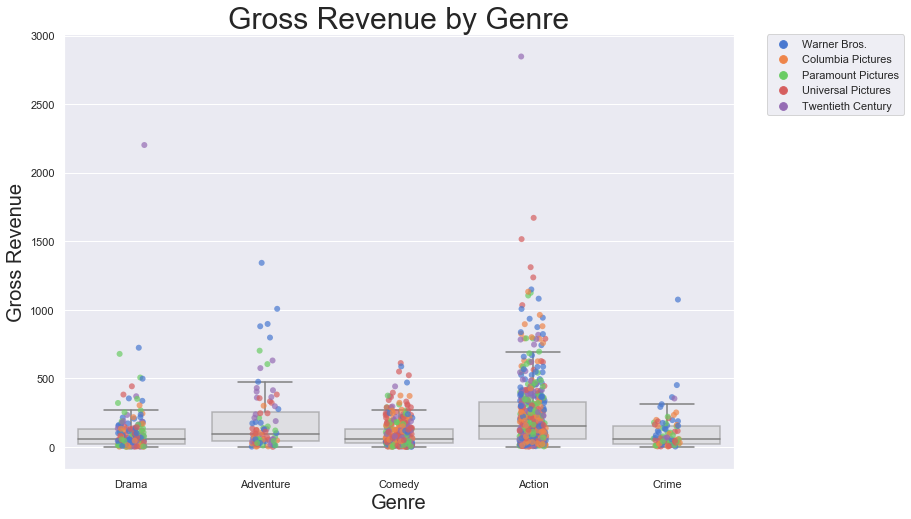

In [93]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data = df3, x='genre', y='gross_million', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(data = df3, x='genre', y='gross_million', jitter=True, size=6, linewidth=0, hue = 'company', alpha=0.7)

ax.axes.set_title('Gross Revenue by Genre', fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross Revenue', fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)